Daniel Conrado Monroy Madrid 16012674

In [24]:
import numpy as np
import matplotlib.pyplot as plt

## Carga y normalización de la data

In [25]:
images_inception_features = './training_inception_features_array.npy'
training_image_labels_array = './training_image_labels_array.npy'
training_image_names_array = './training_image_names_array.npy'

In [26]:
TRAIN_DICTIONARY_KEYS = ["images", "label","features"]

training_set_dict = dict()
    
training_set_dict['images_name'] = np.load(training_image_names_array)
training_set_dict['label'] = np.load(training_image_labels_array)
training_set_dict['features'] = np.load(images_inception_features)

In [27]:
features = training_set_dict['features']
labels = training_set_dict['label']
images_name = training_set_dict['images_name']

In [28]:
labels_unique = np.unique(labels)
print(len(labels_unique)) ## Esto permite conocer cuántas razas de perros contiene el dataset. 

120


In [29]:
features.shape

(10222, 2048)

In [30]:
labels.shape

(10222,)

Normalización de los datos:

In [8]:
from sklearn import preprocessing

In [9]:
stscaler = preprocessing.StandardScaler()
data_escalada = stscaler.fit_transform(features)

## Implementación PCA (2 dimensiones)

In [10]:
from sklearn.decomposition import PCA

In [11]:
pca = PCA(n_components=2)
pca.fit(data_escalada)

X2d = pca.fit_transform(data_escalada)

In [12]:
print(data_escalada.shape)
print(X2d.shape)

(10222, 2048)
(10222, 2)


Se aplica label enconder en las labels para poder graficar:

In [13]:
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(labels)
labels_enc = label_encoder.transform(labels)

In [14]:
print(labels_enc)  ## Cada número representa una raza

[19 37 85 ...  3 75 28]


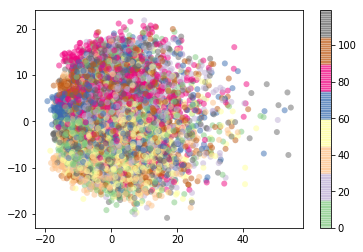

In [15]:
plt.scatter(X2d[:, 0], X2d[:, 1],
            c=labels_enc, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 120))
plt.colorbar()

## Clustering con versión reducida

In [16]:
from sklearn.cluster import KMeans

In [17]:
Kmeans = KMeans(n_clusters=120, random_state=0).fit(X2d)

In [18]:
Kmeans.predict(X2d)

array([74, 59, 40, ..., 19, 56, 44])

In [31]:
clustersk = Kmeans.cluster_centers_
print(clustersk)

[[-10.262766     8.880545  ]
 [ -2.3883872    2.8309925 ]
 [  2.3194392  -12.076959  ]
 [ 28.197138    10.50172   ]
 [-12.063392    -3.6658614 ]
 [ 15.284231    -2.1015913 ]
 [  9.407372     7.8854094 ]
 [  1.5203966   -6.6445403 ]
 [ -0.23133631  15.264763  ]
 [ -6.919953    -9.679686  ]
 [ 15.562097    -9.686011  ]
 [ -4.6887536   -2.2440956 ]
 [  3.6697316    5.2376146 ]
 [  5.6086493   -6.6981077 ]
 [ -5.2438836    7.4102225 ]
 [ 28.50927     -1.4137139 ]
 [ 16.849197     9.330593  ]
 [ -7.9293256    3.9326198 ]
 [ 46.85206      3.0593917 ]
 [  9.172248    -0.29312193]
 [ 12.044214   -12.227753  ]
 [ -0.39370885  -1.1393659 ]
 [  9.558951    15.498352  ]
 [-13.254942     1.0907388 ]
 [ 12.16905     -4.3359785 ]
 [ -9.604508   -11.175915  ]
 [ -7.030963    -0.98513854]
 [ -3.6711116    9.769288  ]
 [ -7.7176933   14.199622  ]
 [ -1.3433057   -9.493547  ]
 [ 36.05412    -11.971599  ]
 [  7.7866917  -11.358629  ]
 [  3.571415    13.618859  ]
 [ 18.940432     5.7869716 ]
 [  5.9483857 

In [32]:
Kmeans.cluster_centers_.shape

(120, 2)

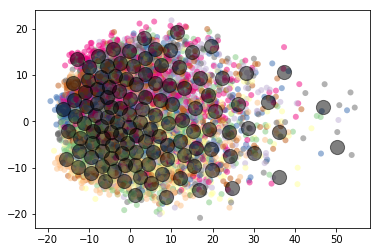

In [33]:
plt.scatter(X2d[:, 0], X2d[:, 1],
            c=labels_enc, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 120))
plt.scatter(clustersk[:, 0], clustersk[:, 1], c='black', s=200, alpha=0.5);